# Download

In [4]:
import os
import time
import shutil
from pathlib import Path

import pandas as pd
from tqdm import tqdm
from IPython.display import Audio, display
from mutagen.mp3 import MP3
from mutagen.wave import WAVE

from utils import download_audios, download_texts
from utils.usx_parser import usx_to_dataframe, usx_directory_to_dataframe

## Audios and timing files

In [ ]:
# Directory containing HTML files
html_dir = Path("html_files/audios")
output_base_dir = Path("audios")

# Get all HTML files
html_files = sorted(html_dir.glob("*.html"))

print(f"Found {len(html_files)} languages to process")

for i, html_path in enumerate(html_files):
    lang_name = html_path.stem  # Get filename without extension
    print(f"\n{'='*60}")
    print(f"[{i+1}/{len(html_files)}] Processing: {lang_name}")
    print(f"{'='*60}")
    
    try:
        # 1) Parse HTML -> dict(name -> URL)
        links = download_audios.extract_artifact_links(str(html_path))
        print(f"Found {len(links)} artifacts")
        
        # 2) Download + unzip into folders
        output_dir = output_base_dir / lang_name
        download_audios.download_and_unzip_all(links, str(output_dir), overwrite=False, timeout=60)
        
        print(f"✓ Successfully processed {lang_name}")
        
    except Exception as e:
        print(f"✗ Failed to process {lang_name}: {e}")
        continue
    
    # Sleep 1 minute between languages (except after the last one)
    if i < len(html_files) - 1:
        print(f"\nSleeping for 1 minute before next language...")
        time.sleep(60)

print(f"\n{'='*60}")
print("All languages processed!")
print(f"{'='*60}")



## Text files

ImportError: cannot import name 'downloads_texts' from 'utils' (unknown location)

In [ ]:
# Directory containing HTML files
html_dir = Path("html_files/text")
output_base_dir = Path("texts")

# Get all HTML files
html_files = sorted(html_dir.glob("*.html"))

print(f"Found {len(html_files)} languages to process")

for i, html_path in enumerate(html_files):
    lang_name = html_path.stem  # Get filename without extension
    print(f"\n{'='*60}")
    print(f"[{i+1}/{len(html_files)}] Processing: {lang_name}")
    print(f"{'='*60}")
    
    try:
        # 1) Parse HTML -> dict(name -> URL)
        links = downloads_texts.extract_artifact_links(str(html_path))
        print(f"Found {len(links)} artifacts")
        
        # 2) Download + unzip into folders
        output_dir = output_base_dir / lang_name
        downloads_texts.download_and_unzip_all(links, str(output_dir), overwrite=False, timeout=60)
        
        print(f"✓ Successfully processed {lang_name}")
        
    except Exception as e:
        print(f"✗ Failed to process {lang_name}: {e}")
        continue
    
    # Sleep 1 minute between languages (except after the last one)
    if i < len(html_files) - 1:
        print(f"\nSleeping for 1 minute before next language...")
        # time.sleep(60)

print(f"\n{'='*60}")
print("All languages processed!")
print(f"{'='*60}")



# Parsing text files

## USX

In [3]:
path = "data/texts/Yoruba/USX/release/USX_1/GEN.usx"
df = usx_to_dataframe(path, include_headings=False)
df

,book,chapter,verse,text
0,GEN,1,1,Ní ìbẹ̀rẹ̀ ohun gbogbo Ọlọ́run dá àwọn ọ̀run à...
1,GEN,1,2,"Ayé sì wà ní rúdurùdu, ó sì ṣófo, òkùnkùn sì w..."
2,GEN,1,3,"Ọlọ́run sì wí pé, “Jẹ́ kí ìmọ́lẹ̀ kí ó wà,” ìm..."
3,GEN,1,4,"Ọlọ́run rí i pé ìmọ́lẹ̀ náà dára, ó sì ya ìmọ́..."
4,GEN,1,5,"Ọlọ́run sì pe ìmọ́lẹ̀ náà ní “ọ̀sán,” àti òkùn..."
...,...,...,...,...
1528,GEN,50,22,Josẹfu sì ń gbé ní Ejibiti pẹ̀lú gbogbo ìdílé ...
1529,GEN,50,23,"Ó sì rí ìran kẹta ọmọ Efraimu-Àwọn ọmọ Makiri,..."
1530,GEN,50,24,Nígbà náà ni Josẹfu wí fún àwọn arákùnrin rẹ̀ ...
1531,GEN,50,25,Josẹfu sì mú kí àwọn ọmọ Israẹli búra májẹ̀mú ...


In [4]:
path = "data/texts/Yoruba/USX/release/USX_1/"
df = usx_directory_to_dataframe(path, include_headings=False)
df

,book,chapter,verse,text
0,1CH,1,1,"Adamu, Seti, Enoṣi,"
1,1CH,1,2,"Kenani, Mahalaleli, Jaredi,"
2,1CH,1,3,"Enoku, Metusela, Lameki, Noa."
3,1CH,1,4,"Àwọn ọmọ Noa: Ṣemu, Hamu àti Jafeti."
4,1CH,1,5,"Àwọn ọmọ Jafeti ni: Gomeri, Magogu, Madai; Jaf..."
...,...,...,...,...
31082,ZEP,3,16,"Ní ọjọ́ náà, wọn yóò sọ fún Jerusalẹmu pé, “Má..."
31083,ZEP,3,17,"Olúwa Ọlọ́run rẹ wà pẹ̀lú rẹ, Ó ní agbára láti..."
31084,ZEP,3,18,“Èmi ó kó àwọn tí ó ń banújẹ́ fún àjọ̀dún tí a...
31085,ZEP,3,19,Ní àkókò náà ni èmi yóò dojúkọ àwọn tí ń ni yí...


In [ ]:


def test_usx_parser_all_files(texts_dir: str = "data/texts") -> pd.DataFrame:
    """
    Test usx_to_dataframe on all USX files in the texts directory.
    
    Args:
        texts_dir: Path to the texts directory containing language folders.
        
    Returns:
        DataFrame with columns: language, file_path, success, error_message, num_rows
    """
    texts_path = Path(texts_dir)
    
    # Find all USX files
    # Include all USX files under the texts_path (looks for any .usx at any subdirectory depth)
    usx_files = list(texts_path.glob("**/*.usx"))
    
    results = []
    for usx_file in tqdm(usx_files, desc="Testing USX files"):
        # Extract language from path (first directory under texts_dir)
        relative_path = usx_file.relative_to(texts_path)
        language = relative_path.parts[0]
        
        # Test parsing
        try:
            df = usx_to_dataframe(usx_file, include_headings=False)
            results.append({
                "language": language,
                "file_path": str(usx_file),
                "success": True,
                "error_message": None,
                "num_rows": len(df)
            })
        except Exception as e:
            results.append({
                "language": language,
                "file_path": str(usx_file),
                "success": False,
                "error_message": str(e),
                "num_rows": None
            })
    
    return pd.DataFrame(results)


# Run the test
results_df = test_usx_parser_all_files(texts_dir="data/texts")
results_df

In [6]:
results_df["language"].nunique()

39

In [7]:
all_files = os.listdir("data/texts")
set(all_files) - set(results_df["language"])

{'Toma'}

In [8]:
# Summary statistics
print(f"Total files tested: {len(results_df)}")
print(f"Successful: {results_df['success'].sum()}")
print(f"Failed: {(~results_df['success']).sum()}")
print(f"\nLanguages: {results_df['language'].nunique()}")

# Show failures if any
failed_df = results_df[~results_df['success']]
if len(failed_df) > 0:
    print(f"\n--- Failed files ---")
    display(failed_df)
else:
    print("\nAll files parsed successfully!")
    
# Summary by language
summary_by_lang = results_df.groupby('language').agg({
    'success': ['sum', 'count'],
    'num_rows': 'sum'
}).reset_index()
summary_by_lang.columns = ['language', 'successful_files', 'total_files', 'total_rows']
summary_by_lang['success_rate'] = summary_by_lang['successful_files'] / summary_by_lang['total_files']
print("\n--- Summary by language ---")
summary_by_lang

Total files tested: 2514
Successful: 2514
Failed: 0

Languages: 39

All files parsed successfully!

--- Summary by language ---


,language,successful_files,total_files,total_rows,success_rate
0,Apali,29,29,10218,1.0
1,Arabic Standard,66,66,31103,1.0
2,Assamese,66,66,31092,1.0
3,Bengali,66,66,31096,1.0
4,Central Kurdish,66,66,31103,1.0
5,Chhattisgarhi,66,66,31103,1.0
6,Chichewa,66,66,31104,1.0
7,Dawro,66,66,30815,1.0
8,Dholuo,66,66,31103,1.0
9,Ewe,66,66,31103,1.0


# Getting all audios

In [17]:
def get_audio_duration(file_path: Path, audio_format: str) -> float:
    """Get audio duration in seconds. Returns NaN if unreadable."""
    try:
        if audio_format == "mp3":
            audio = MP3(file_path)
        elif audio_format == "wav":
            audio = WAVE(file_path)
        else:
            return float("nan")
        return round(audio.info.length, 2)
    except Exception:
        return float("nan")


def get_all_audio_files(audios_dir: str = "data/audios") -> pd.DataFrame:
    """
    Get all audio files in the audios directory.
    
    Args:
        audios_dir: Path to the audios directory containing language folders.
        
    Returns:
        DataFrame with columns: language, testament, book, file_name, file_path, 
                               format, file_size_mb, duration_seconds
    """
    audios_path = Path(audios_dir)
    
    # Find all audio files (mp3 and wav)
    audio_extensions = ["*.mp3", "*.wav"]
    audio_files = []
    for ext in audio_extensions:
        audio_files.extend(audios_path.glob(f"**/{ext}"))
    
    results = []
    for audio_file in tqdm(audio_files, desc="Collecting audio files"):
        # Extract info from path
        # Structure: data/audios/{language}/{Testament - format}/{Book}/{file}
        relative_path = audio_file.relative_to(audios_path)
        parts = relative_path.parts
        
        # Skip files in Alignment directories (processed outputs, not raw audios)
        if "Alignment" in parts:
            continue
        
        if len(parts) >= 4:
            language = parts[0]
            testament_format = parts[1]  # e.g., "New Testament - mp3"
            book = parts[2]
            file_name = parts[3]
        else:
            # Handle unexpected structure
            language = parts[0] if len(parts) > 0 else "unknown"
            testament_format = parts[1] if len(parts) > 1 else "unknown"
            book = parts[2] if len(parts) > 2 else "unknown"
            file_name = audio_file.name
        
        # Get file size in MB
        file_size_mb = audio_file.stat().st_size / (1024 * 1024)
        
        # Get audio format from extension
        audio_format = audio_file.suffix.lower().lstrip(".")
        
        # Get duration (mutagen reads metadata without decoding the full file)
        duration_seconds = get_audio_duration(audio_file, audio_format)
        
        results.append({
            "language": language,
            "testament_format": testament_format,
            "book": book,
            "file_name": file_name,
            "file_path": str(audio_file),
            "format": audio_format,
            "file_size_mb": round(file_size_mb, 2),
            "duration_seconds": duration_seconds
        })
    
    return pd.DataFrame(results)


# Run the function
audio_df = get_all_audio_files(audios_dir="data/audios")
audio_df

,language,testament_format,book,file_name,file_path,format,file_size_mb,duration_seconds
0,Apali,New Testament - mp3,Matthew,MAT_001.mp3,data/audios/Apali/New Testament - mp3/Matthew/...,mp3,3.41,446.60
1,Apali,New Testament - mp3,Matthew,MAT_002.mp3,data/audios/Apali/New Testament - mp3/Matthew/...,mp3,5.11,670.10
2,Apali,New Testament - mp3,Matthew,MAT_003.mp3,data/audios/Apali/New Testament - mp3/Matthew/...,mp3,3.11,407.70
3,Apali,New Testament - mp3,Matthew,MAT_004.mp3,data/audios/Apali/New Testament - mp3/Matthew/...,mp3,4.13,541.80
4,Apali,New Testament - mp3,Matthew,MAT_005.mp3,data/audios/Apali/New Testament - mp3/Matthew/...,mp3,9.90,1297.60
...,...,...,...,...,...,...,...,...
47790,Toma,Old Testament - wav,Zechariah,source,data/audios/Toma/Old Testament - wav/Zechariah...,wav,22.55,158.14
47791,Toma,Old Testament - wav,Zechariah,source,data/audios/Toma/Old Testament - wav/Zechariah...,wav,46.17,329.56
47792,Toma,Old Testament - wav,Malachi,source,data/audios/Toma/Old Testament - wav/Malachi/s...,wav,36.27,257.75
47793,Toma,Old Testament - wav,Malachi,source,data/audios/Toma/Old Testament - wav/Malachi/s...,wav,39.36,280.18


In [15]:
# Total hours per language
hours_per_language = (
    audio_df
    .assign(duration_seconds=pd.to_numeric(audio_df["duration_seconds"], errors="coerce"))
    .groupby("language", as_index=False)
    .agg(
        files=("duration_seconds", "size"),
        readable_files=("duration_seconds", lambda s: s.notna().sum()),
        total_seconds=("duration_seconds", "sum"),
    )
    .assign(
        total_hours=lambda df: df["total_seconds"] / 3600,
        total_hours_rounded=lambda df: df["total_hours"].round(2),
    )
    .sort_values("language", ascending=False)
)

hours_per_language[["language", "files", "readable_files", "total_hours_rounded"]]


,language,files,readable_files,total_hours_rounded
39,Yoruba,1189,1189,93.66
38,Vietnamese,1189,1189,75.32
37,Urdu,1189,1189,91.64
36,Ukrainian,410,410,27.74
35,Twi (Asante),1189,1189,82.62
34,Twi (Akuapem),1189,1189,75.73
33,Turkish,1189,1189,65.30
32,Toma,1858,1858,198.99
31,Telugu,1189,1189,98.63
30,Tamil,1189,1189,96.76


In [18]:
total_hours_all_languages = audio_df["duration_seconds"].sum() / 3600
print(f"TOTAL HOURS (all languages): {total_hours_all_languages:.2f}")

TOTAL HOURS (all languages): 4068.70


## Timing files

In [9]:
def get_languages_with_timing_files(audios_dir: str = "data/audios") -> pd.DataFrame:
    """
    Check which languages have a 'Timing Files' folder.
    
    Args:
        audios_dir: Path to the audios directory containing language folders.
        
    Returns:
        DataFrame with columns: language, has_timing_files
    """
    audios_path = Path(audios_dir)
    
    # Get all language directories (immediate subdirectories)
    language_dirs = [d for d in audios_path.iterdir() if d.is_dir()]
    
    results = []
    for lang_dir in sorted(language_dirs):
        timing_folder = lang_dir / "Timing Files"
        results.append({
            "language": lang_dir.name,
            "has_timing_files": timing_folder.exists() and timing_folder.is_dir()
        })
    
    return pd.DataFrame(results)


# Run the function
timing_df = get_languages_with_timing_files(audios_dir="data/audios")
timing_df["has_timing_files"].value_counts()

has_timing_files
True     28
False    12
Name: count, dtype: int64

In [13]:
for _, row in timing_df.iterrows():
    if row["has_timing_files"]:
        language = row["language"]
        cmd = f'python utils/process_all_books.py --base_path "data/audios/{language}" --workers 16'
        print(cmd)

python utils/process_all_books.py --base_path "data/audios/Assamese" --workers 16
python utils/process_all_books.py --base_path "data/audios/Bengali" --workers 16
python utils/process_all_books.py --base_path "data/audios/Central Kurdish" --workers 16
python utils/process_all_books.py --base_path "data/audios/Chhattisgarhi" --workers 16
python utils/process_all_books.py --base_path "data/audios/Dholuo" --workers 16
python utils/process_all_books.py --base_path "data/audios/Ewe" --workers 16
python utils/process_all_books.py --base_path "data/audios/Gujarati" --workers 16
python utils/process_all_books.py --base_path "data/audios/Haryanvi" --workers 16
python utils/process_all_books.py --base_path "data/audios/Hausa" --workers 16
python utils/process_all_books.py --base_path "data/audios/Hiligaynon" --workers 16
python utils/process_all_books.py --base_path "data/audios/Hindi" --workers 16
python utils/process_all_books.py --base_path "data/audios/Igbo" --workers 16
python utils/process

In [17]:
timing_df["has_timing_files"].value_counts()

has_timing_files
True     28
False    12
Name: count, dtype: int64

# Alignment

In [5]:
# %%bash
# # This works, but only for one book
# python utils/split_verse_lingala.py \
#     -wav_folder "data/audios/Lingala/New Testament - mp3/1 Corinthians/" \
#     -timing_folder "data/audios/Lingala/Timing Files/Timing Files Bundle/" \
#     -book_sfm "data/texts/Lingala/Paratext (USFM)/release/USX_1/1CO.usfm" \
#     -output "data/audios/Lingala/Alignment/1 Corinthians"

In [61]:
df_lingala = build_dataframe()
csv_path = os.path.join(BASE_PATH, "lingala_book_metadata.csv")
df_lingala.to_csv(csv_path, index=False)
df_lingala

,book_name,book_code,testament,wav_folder,timing_folder,book_sfm,output,usfm_exists
0,1 Corinthians,1CO,New Testament - mp3,data/audios/Lingala/New Testament - mp3/1 Cori...,data/audios/Lingala/Timing Files/Timing Files ...,data/texts/Lingala/Paratext (USFM)/release/USX...,data/audios/Lingala/Alignment/1 Corinthians,True
1,1 John,1JN,New Testament - mp3,data/audios/Lingala/New Testament - mp3/1 John,data/audios/Lingala/Timing Files/Timing Files ...,data/texts/Lingala/Paratext (USFM)/release/USX...,data/audios/Lingala/Alignment/1 John,True
2,1 Peter,1PE,New Testament - mp3,data/audios/Lingala/New Testament - mp3/1 Peter,data/audios/Lingala/Timing Files/Timing Files ...,data/texts/Lingala/Paratext (USFM)/release/USX...,data/audios/Lingala/Alignment/1 Peter,True
3,1 Thessalonians,1TH,New Testament - mp3,data/audios/Lingala/New Testament - mp3/1 Thes...,data/audios/Lingala/Timing Files/Timing Files ...,data/texts/Lingala/Paratext (USFM)/release/USX...,data/audios/Lingala/Alignment/1 Thessalonians,True
4,1 Timothy,1TI,New Testament - mp3,data/audios/Lingala/New Testament - mp3/1 Timothy,data/audios/Lingala/Timing Files/Timing Files ...,data/texts/Lingala/Paratext (USFM)/release/USX...,data/audios/Lingala/Alignment/1 Timothy,True
...,...,...,...,...,...,...,...,...
61,Psalms,PSA,Old Testament - mp3,data/audios/Lingala/Old Testament - mp3/Psalms,data/audios/Lingala/Timing Files/Timing Files ...,data/texts/Lingala/Paratext (USFM)/release/USX...,data/audios/Lingala/Alignment/Psalms,True
62,Ruth,RUT,Old Testament - mp3,data/audios/Lingala/Old Testament - mp3/Ruth,data/audios/Lingala/Timing Files/Timing Files ...,data/texts/Lingala/Paratext (USFM)/release/USX...,data/audios/Lingala/Alignment/Ruth,True
63,Song of Songs,SNG,Old Testament - mp3,data/audios/Lingala/Old Testament - mp3/Song o...,data/audios/Lingala/Timing Files/Timing Files ...,data/texts/Lingala/Paratext (USFM)/release/USX...,data/audios/Lingala/Alignment/Song of Songs,True
64,Zechariah,ZEC,Old Testament - mp3,data/audios/Lingala/Old Testament - mp3/Zechariah,data/audios/Lingala/Timing Files/Timing Files ...,data/texts/Lingala/Paratext (USFM)/release/USX...,data/audios/Lingala/Alignment/Zechariah,True


In [19]:
def get_alignment_directories(audios_dir="data/audios"):
    """
    Returns a list of all folders in audios_dir that end with '/Alignment'.
    Example: data/audios/LANGUAGE/Alignment/
    """
    audios_path = Path(audios_dir)
    alignment_dirs = []
    for language_dir in audios_path.iterdir():
        if language_dir.is_dir():
            alignment_dir = language_dir / "Alignment"
            if alignment_dir.is_dir():
                alignment_dirs.append(str(alignment_dir))
    return alignment_dirs

alignment_dirs = get_alignment_directories(audios_dir="data/audios")
print(alignment_dirs)

for alignment_dir in alignment_dirs:
    try:
        shutil.rmtree(alignment_dir)
        print(f"Deleted: {alignment_dir}")
    except Exception as e:
        print(f"Failed to delete {alignment_dir}: {e}")

['data/audios/Bengali/Alignment']
Deleted: data/audios/Bengali/Alignment


## Statistics

In [ ]:
# Another function that only counts audio files under an alignment directory

In [63]:
def get_alignment_audio_files(audios_dir: str = "data/audios") -> pd.DataFrame:
    """
    Get all audio files in Alignment directories only.
    
    Args:
        audios_dir: Path to the audios directory containing language folders.
        
    Returns:
        DataFrame with columns: language, book, file_name, file_path, 
                               format, file_size_mb, duration_seconds
    """
    audios_path = Path(audios_dir)
    
    # Find all audio files (mp3 and wav)
    audio_extensions = ["*.mp3", "*.wav"]
    audio_files = []
    for ext in audio_extensions:
        audio_files.extend(audios_path.glob(f"**/{ext}"))
    
    results = []
    for audio_file in tqdm(audio_files, desc="Collecting alignment audio files"):
        # Extract info from path
        relative_path = audio_file.relative_to(audios_path)
        parts = relative_path.parts
        
        # Only include files in Alignment directories
        if "Alignment" not in parts:
            continue
        
        # Structure: data/audios/{language}/Alignment/{Book}/{file}
        if len(parts) >= 4:
            language = parts[0]
            book = parts[2]  # Skip "Alignment" at parts[1]
            file_name = parts[3]
        else:
            # Handle unexpected structure
            language = parts[0] if len(parts) > 0 else "unknown"
            book = parts[2] if len(parts) > 2 else "unknown"
            file_name = audio_file.name
        
        # Get file size in MB
        file_size_mb = audio_file.stat().st_size / (1024 * 1024)
        
        # Get audio format from extension
        audio_format = audio_file.suffix.lower().lstrip(".")
        
        # Get duration (mutagen reads metadata without decoding the full file)
        duration_seconds = get_audio_duration(audio_file, audio_format)
        
        results.append({
            "language": language,
            "book": book,
            "file_name": file_name,
            "file_path": str(audio_file),
            "format": audio_format,
            "file_size_mb": round(file_size_mb, 2),
            "duration_seconds": duration_seconds
        })
    
    return pd.DataFrame(results)


# Run the function
alignment_df = get_alignment_audio_files(audios_dir="data/audios")
# Just keep the ones under 30 seconds
alignment_df = alignment_df[alignment_df["duration_seconds"] < 30]
alignment_df

,language,book,file_name,file_path,format,file_size_mb,duration_seconds
0,Assamese,1 Kings,1KI_001_Verse_001.wav,data/audios/Assamese/Alignment/1 Kings/1KI_001...,wav,0.91,9.92
1,Assamese,1 Kings,1KI_001_Verse_002.wav,data/audios/Assamese/Alignment/1 Kings/1KI_001...,wav,2.00,21.85
2,Assamese,1 Kings,1KI_001_Verse_003.wav,data/audios/Assamese/Alignment/1 Kings/1KI_001...,wav,1.21,13.22
3,Assamese,1 Kings,1KI_001_Verse_004.wav,data/audios/Assamese/Alignment/1 Kings/1KI_001...,wav,1.25,13.62
4,Assamese,1 Kings,1KI_001_Verse_005.wav,data/audios/Assamese/Alignment/1 Kings/1KI_001...,wav,1.60,17.47
...,...,...,...,...,...,...,...
371281,Dholuo,Zephaniah,ZEP_003_Verse_016.wav,data/audios/Dholuo/Alignment/Zephaniah/ZEP_003...,wav,0.63,6.87
371282,Dholuo,Zephaniah,ZEP_003_Verse_017.wav,data/audios/Dholuo/Alignment/Zephaniah/ZEP_003...,wav,1.00,10.95
371283,Dholuo,Zephaniah,ZEP_003_Verse_018.wav,data/audios/Dholuo/Alignment/Zephaniah/ZEP_003...,wav,0.81,8.84
371284,Dholuo,Zephaniah,ZEP_003_Verse_019.wav,data/audios/Dholuo/Alignment/Zephaniah/ZEP_003...,wav,0.91,9.93


In [ ]:
sample = alignment_df.iloc[-1]
audio_path = sample.file_path
text_path = audio_path.replace(".wav", ".txt")

# Read and print the text corresponding to the audio file
with open(text_path, "r", encoding="utf-8") as f:
    text = f.read()
print(text)

display(Audio(filename=audio_path))

E kindeno abiro choki ndalono anakeli dala biro miyi pak gi huma kind ogendini manie piny mangima a adwokoni gweth mane agwedhigo chon ana ka ineno ehova Nyasaye owacho



Median duration (seconds): 10.41
Mean duration (seconds): 11.297725093769268


[(0.0, 40.0)]

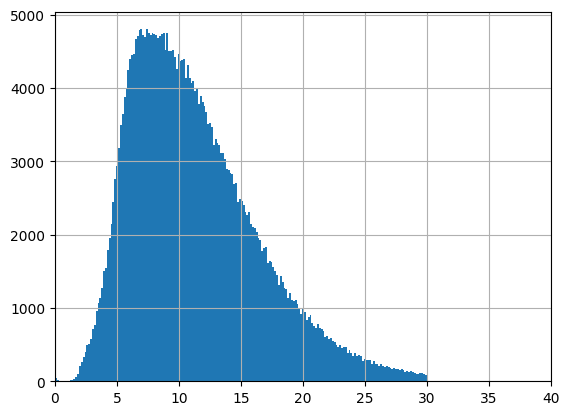

In [65]:
print("Median duration (seconds):", alignment_df["duration_seconds"].median())
print("Mean duration (seconds):", alignment_df["duration_seconds"].mean())

alignment_df["duration_seconds"].hist(bins=200).set(xlim=(0,40))

In [66]:
# List the size of each subfolder under data/audios/Lingala/
! du -sh data/audios/

^C


In [69]:
hours_per_language = (
    alignment_df
    .groupby("language", as_index=False)
    .agg(
        files=("duration_seconds", "size"),
        readable_files=("duration_seconds", lambda s: s.notna().sum()),
        total_seconds=("duration_seconds", "sum"),
    )
    .assign(
        total_hours=lambda df: df["total_seconds"] / 3600,
        total_hours_rounded=lambda df: df["total_hours"].round(2),
    )
    .sort_values("language", ascending=True)
)

hours_per_language


,language,files,readable_files,total_seconds,total_hours,total_hours_rounded
0,Assamese,20782,20782,278632.52,77.397922,77.40
1,Bengali,27702,27702,322104.36,89.473433,89.47
2,Dholuo,22948,22948,205851.12,57.180867,57.18
3,Ewe,27504,27504,310777.40,86.327056,86.33
4,Gujarati,17789,17789,182563.74,50.712150,50.71
5,Hindi,18202,18202,214015.67,59.448797,59.45
6,Kannada,24032,24032,294823.11,81.895308,81.90
7,Lingala,24023,24023,382996.30,106.387861,106.39
8,Malayalam,24237,24237,253140.06,70.316683,70.32
9,Marathi,25255,25255,280793.93,77.998314,78.00


In [68]:
total_hours_all_languages = hours_per_language["total_hours"].sum()
print(f"TOTAL HOURS (all languages): {total_hours_all_languages:.2f}")

TOTAL HOURS (all languages): 1155.48
